In [1]:
import numpy as np
import os
from math import sqrt

from pims import ImageSequence
from skimage.color import rgb2grey
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.measure import find_contours

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from count_synapses import SynapseCounter
%load_ext autoreload
%autoreload 2

In [2]:
params = {'y_start': 200,
         'x_start': 600, 
         'lower_threshold': 50, 
         'upper_threshold': 90,
         'square_size': 10}
filepath = '../Data/Atta/CG379_14_63xZ2_Ca_li/'
sc = SynapseCounter(filepath, params)

../Data/Atta/CG379_14_63xZ2_Ca_li
new


In [3]:
images = sc.final_images
meta_data = sc.meta_data

In [151]:
all_radii = list()
def laplacian_gaussian(image):                                    
    minima = np.linspace(2, 7, 3)                               
    maxima = np.linspace(10, 20, 3)                              
    numbers = np.linspace(100, 150, 3)                              
    thresholds = np.linspace(0.07, 0.09, 3)
    overlap = np.linspace(0.0, 1.0, 3)
    parameters = list(zip(minima, maxima, numbers, thresholds, overlap))   
    blobs = {}                                                    
                                                                  
    for i, params in enumerate(parameters):
        blobs_log = blob_log(                                     
            image,                             
            min_sigma=int((params[0])),
            max_sigma=int((params[1])),
            num_sigma=int(params[2]),
            threshold=params[3],
            overlap=params[4]
        )                                                         
        blobs[i] = [blobs_log, params]
                                                                  
    radii = {}                                                    
    for i, b in blobs.items():                                    
        log_blobs = blobs[i][0]                                   
        radii[i] = [b[2] for b in log_blobs]
    all_radii.extend(radii.values())
        
                                                                  
    for r in radii.values():                                      
        median = np.median(r)                                     
        mean = np.mean(r)                                         
        std = np.std(r)                                           
        print(median, mean, std)                                  
                                                                  
    fig, axes = plt.subplots(                                     
        1, 3, figsize=(15, 30), sharex=True, sharey=True          
    )                                                            
    ax = axes.ravel()                                             
                                                                  
    for i, blob in blobs.items():                                 
        ax[i].set_title(f'{blobs[i][1]}')                         
        ax[i].imshow(image, interpolation='nearest')              
        log_blobs = blobs[i][0]                                   
        for b in log_blobs:                                       
            y, x, r = b                                           
            c = plt.Circle(                                       
                (x, y), r, color='yellow', linewidth=3, fill=False)                                                     
            ax[i].add_patch(c)                                    
        ax[i].set_axis_off()                                      
    plt.tight_layout()                                            
    plt.show() 

In [4]:
all_radii_pre = list()
all_blobs = {}
def laplacian_gaussian(i: int, image):                                      

    blobs_log = blob_log(image, 
                         min_sigma=2,
                         max_sigma=15,
                         num_sigma=125,
                         threshold=0.08,
                         overlap=0.5
                        )                                                                  
                                 
                                                                  
    fig, ax = plt.subplots(                                     
        figsize=(10, 15)      
    )                                                            
    ax.imshow(image, interpolation='nearest')              
                                                      
    for b in blobs_log: 
        y, x, r = b 
        c = plt.Circle(                                       
            (x, y), r, color='yellow', linewidth=5, fill=False)                                                     
        ax.add_patch(c)                                    
        ax.set_axis_off()                                      
        all_radii_pre.append(r)
    plt.tight_layout()                                            
    plt.show() 
    all_blobs[i] = blobs_log

/home/franzi/Projects/automatic-synapse-counting/venv/lib/python3.6/site-packages/skimage/feature/blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
/home/franzi/Projects/automatic-synapse-counting/venv/lib/python3.6/site-packages/skimage/feature/blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/home/franzi/Projects/automatic-synapse-counting/venv/lib/python3.6/site-packages/skimage/feature/blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/home/franzi/Projects/automatic-synapse-counting/venv/lib/python3.6/site-packages/skimage/feature/blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))


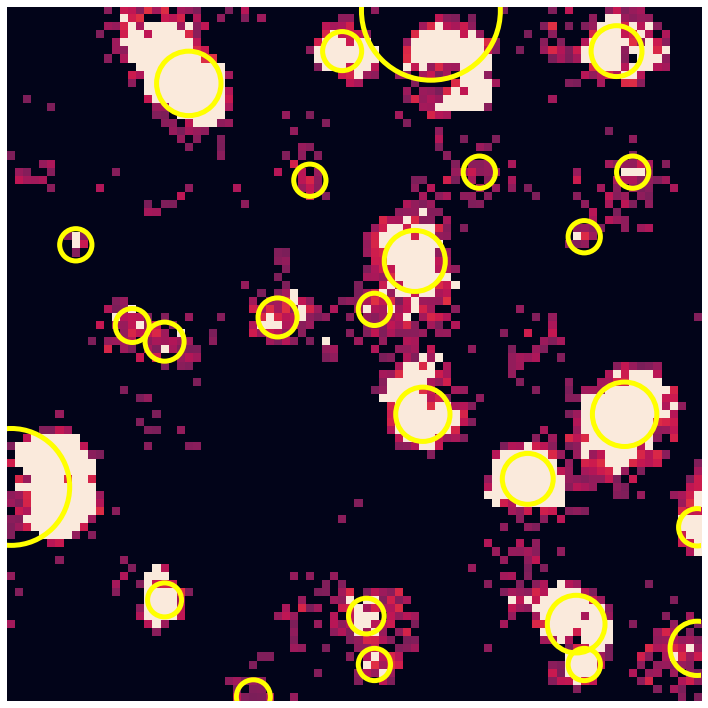

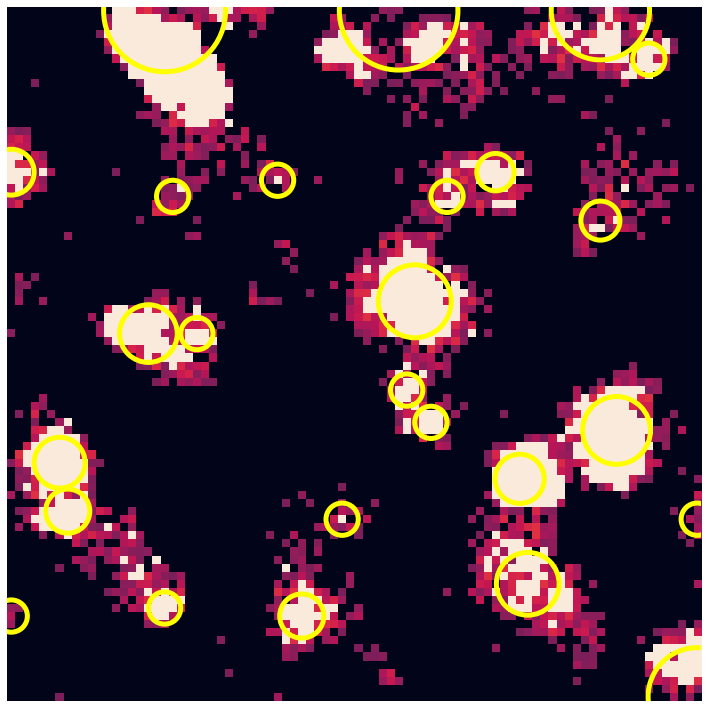

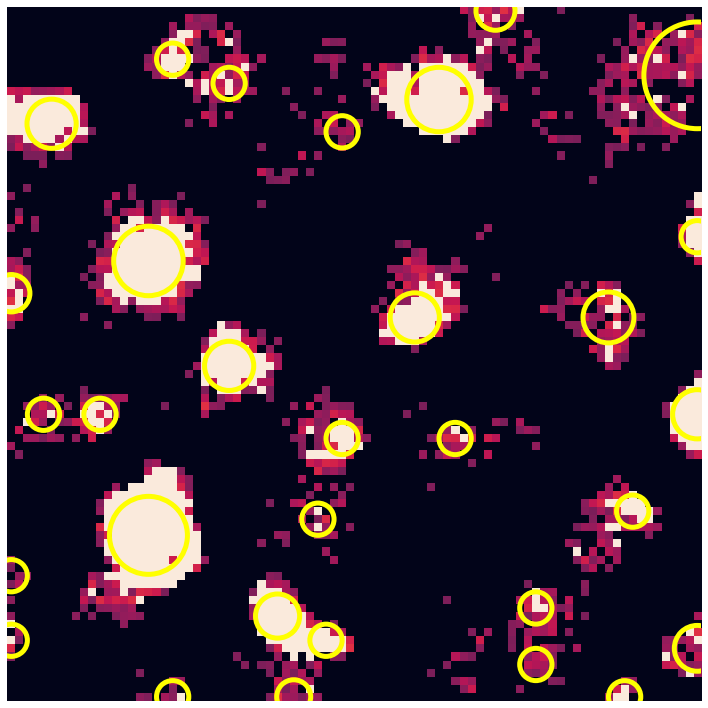

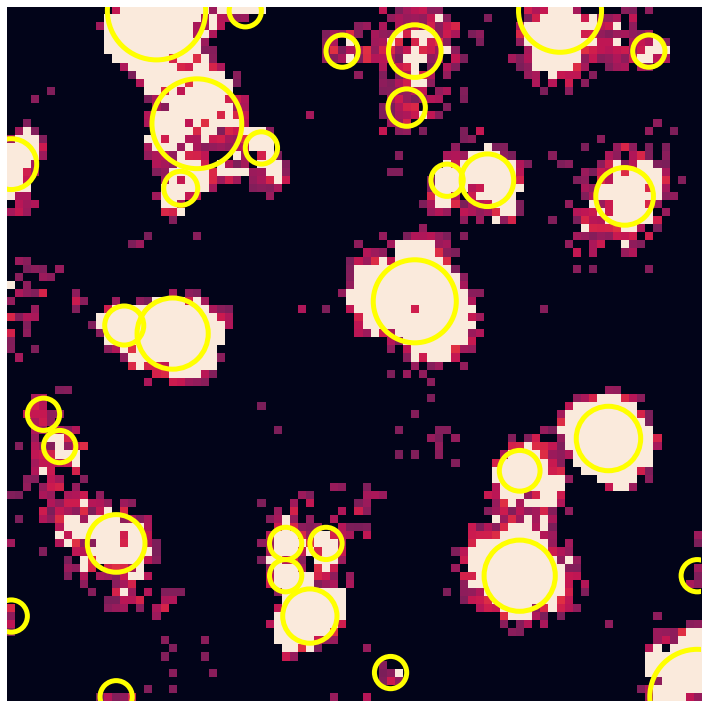

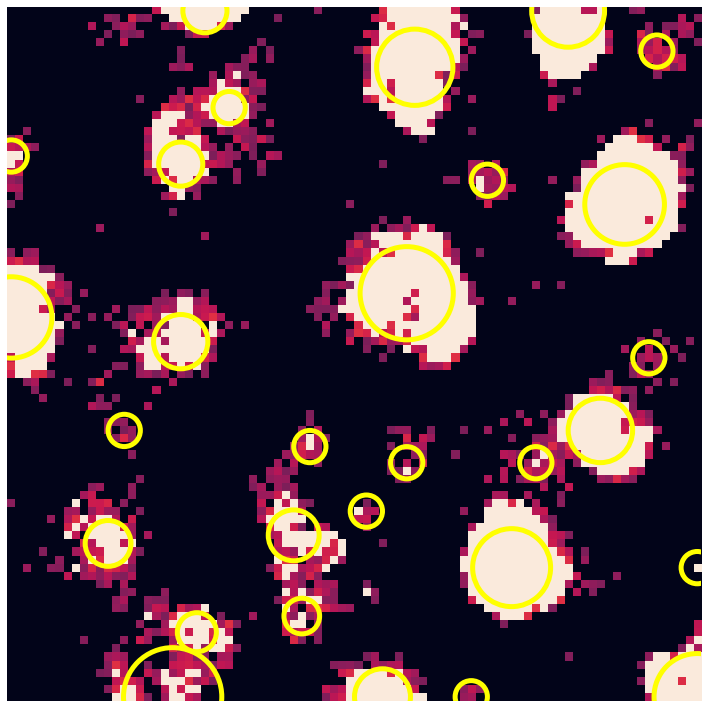

/home/franzi/Projects/automatic-synapse-counting/venv/lib/python3.6/site-packages/skimage/feature/blob.py:127: RuntimeWarning: invalid value encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)


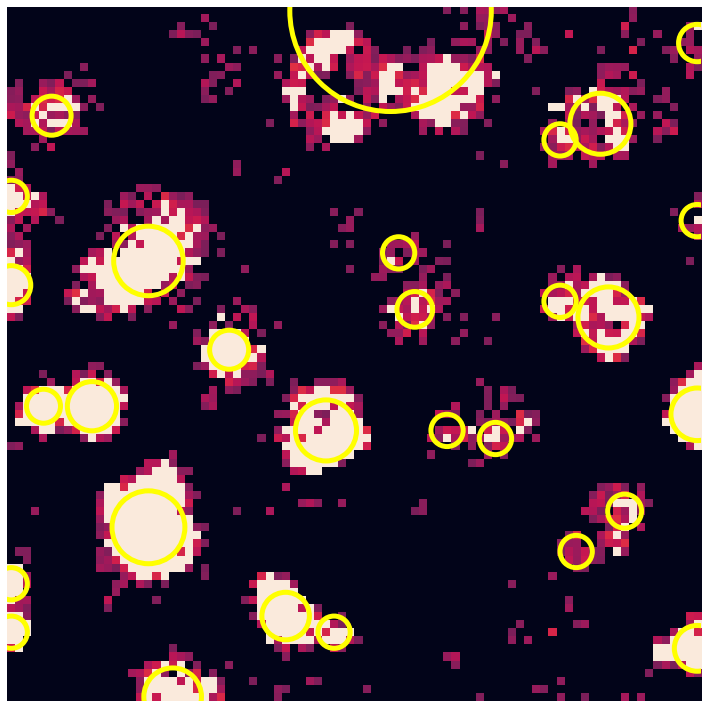

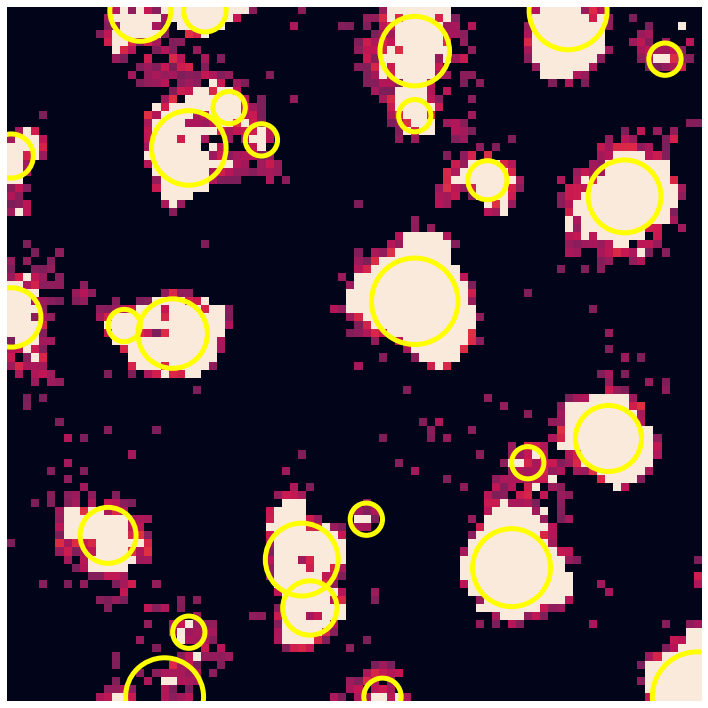

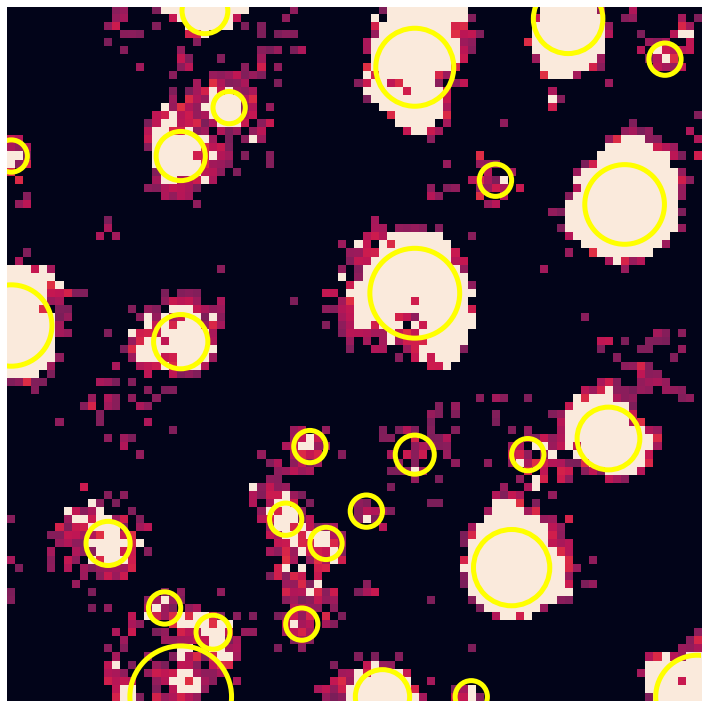

/home/franzi/Projects/automatic-synapse-counting/venv/lib/python3.6/site-packages/skimage/feature/blob.py:126: RuntimeWarning: invalid value encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)


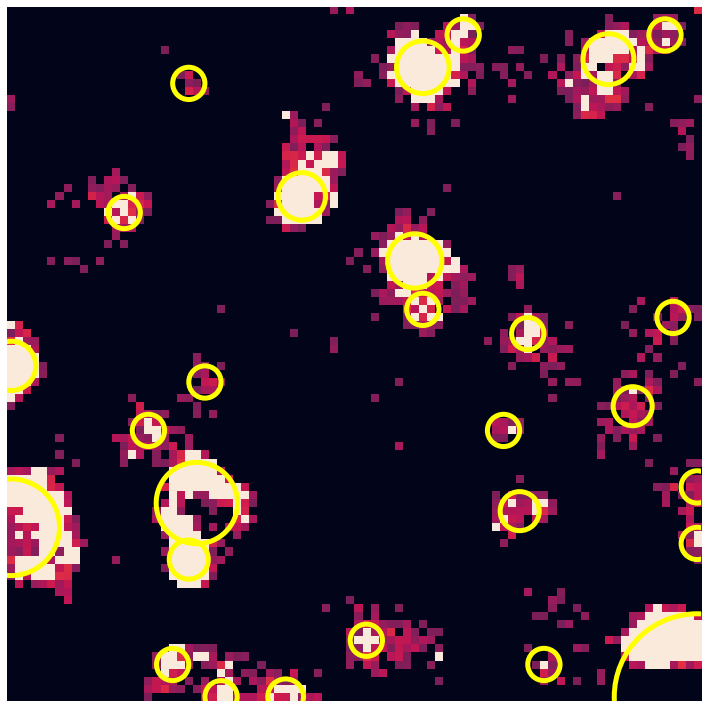

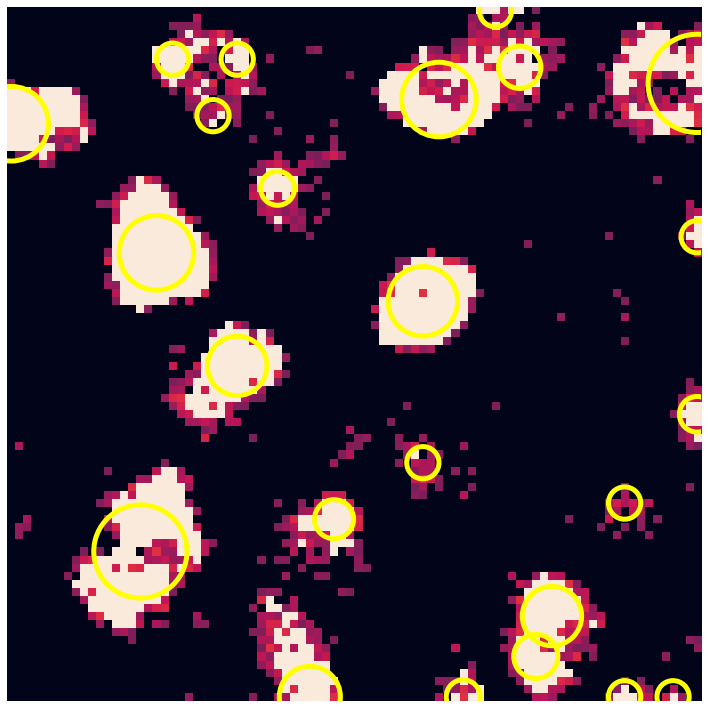

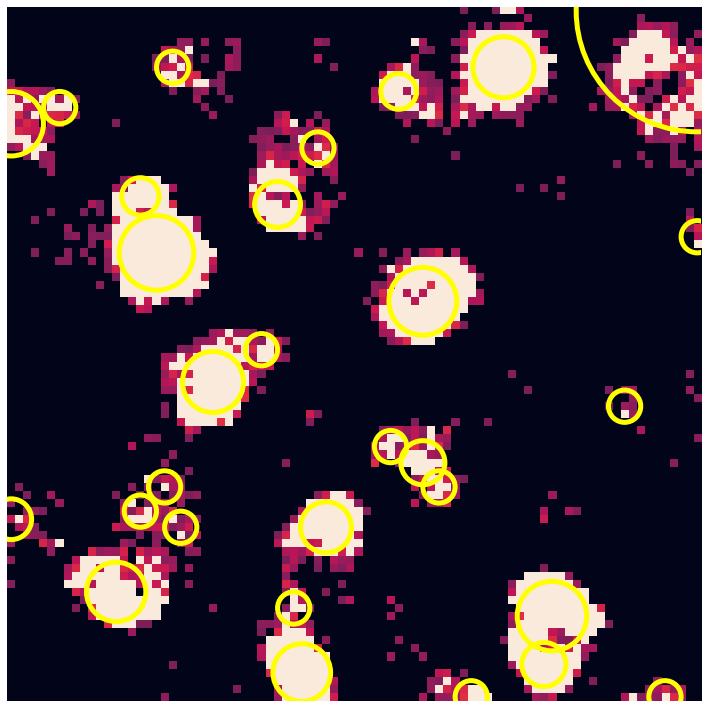

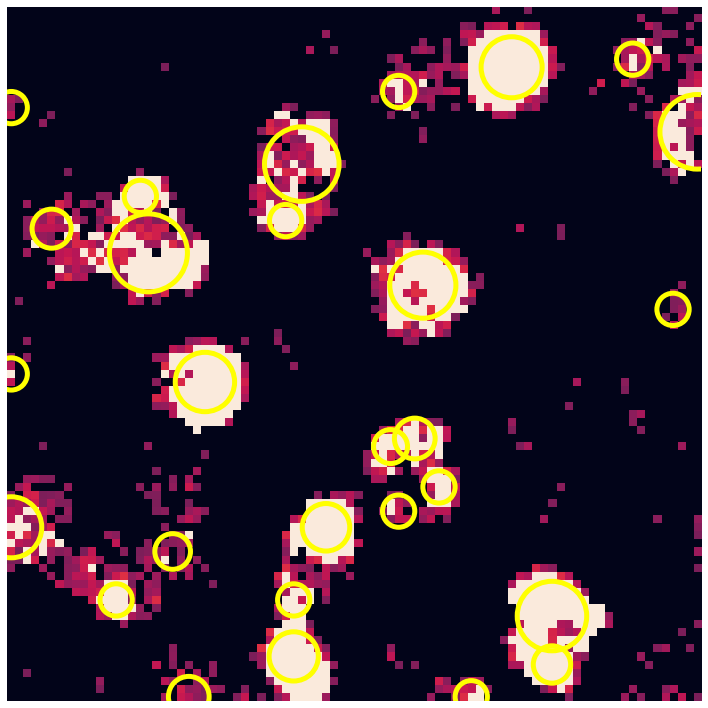

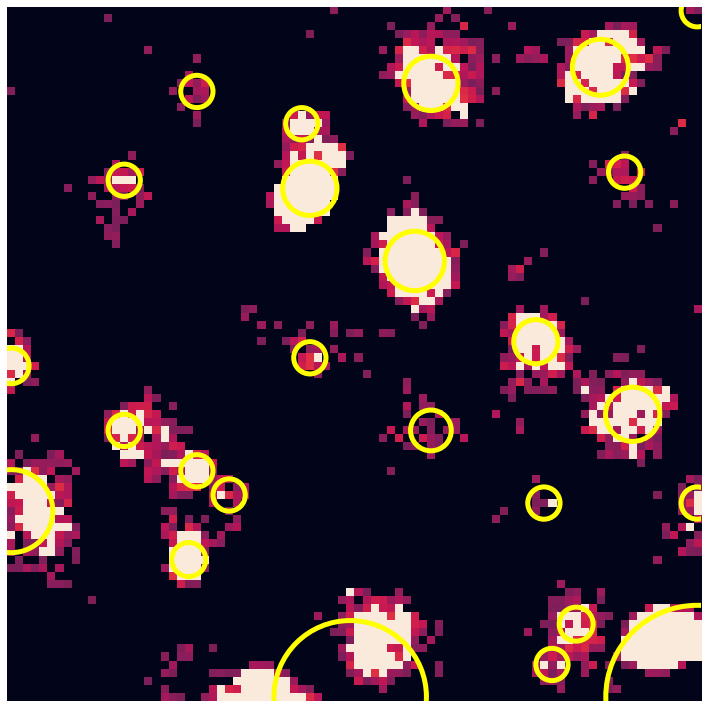

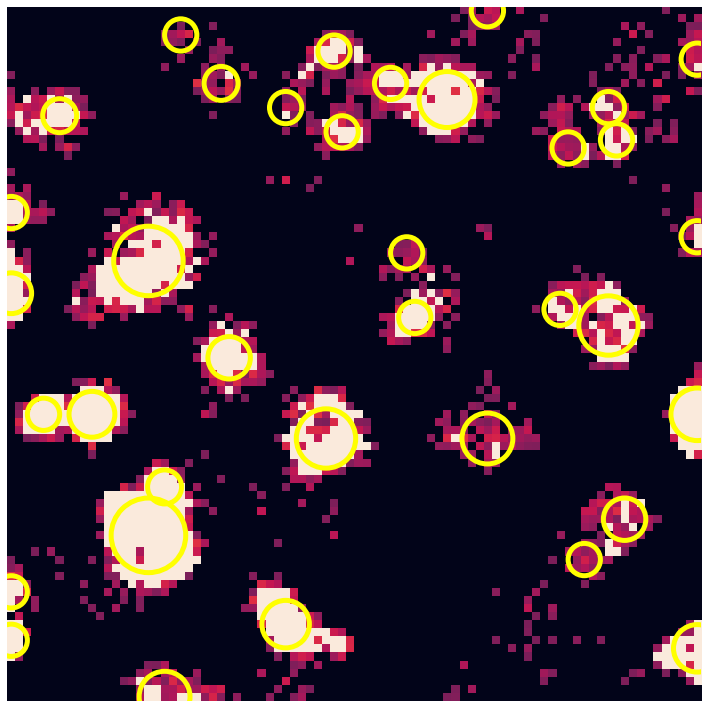

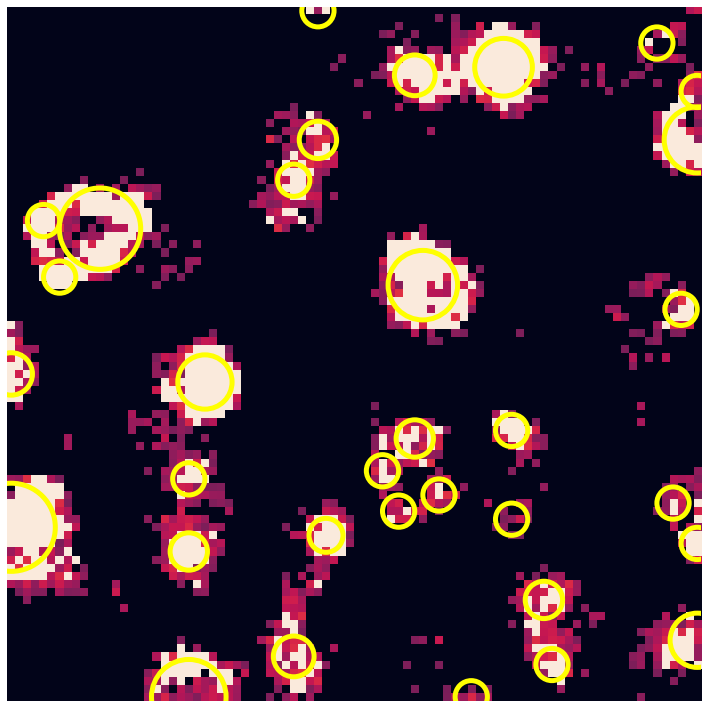

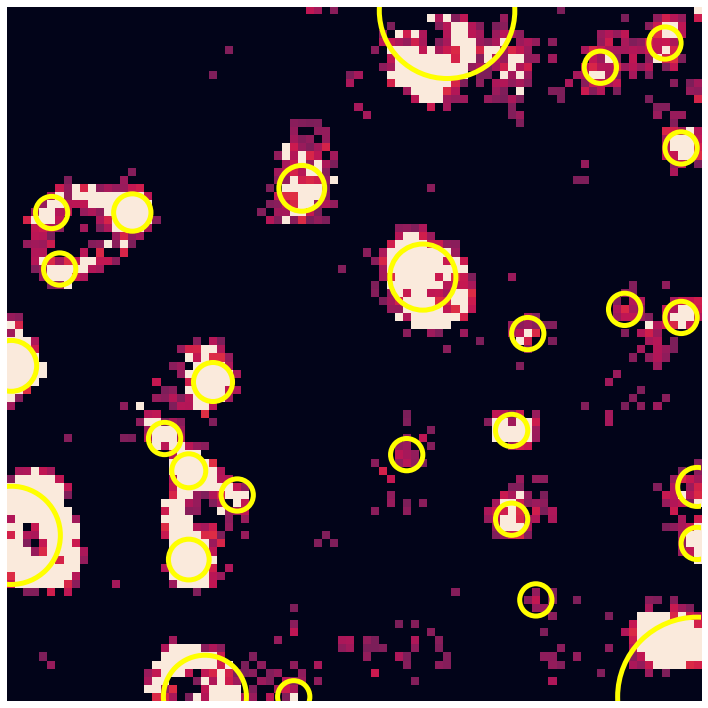

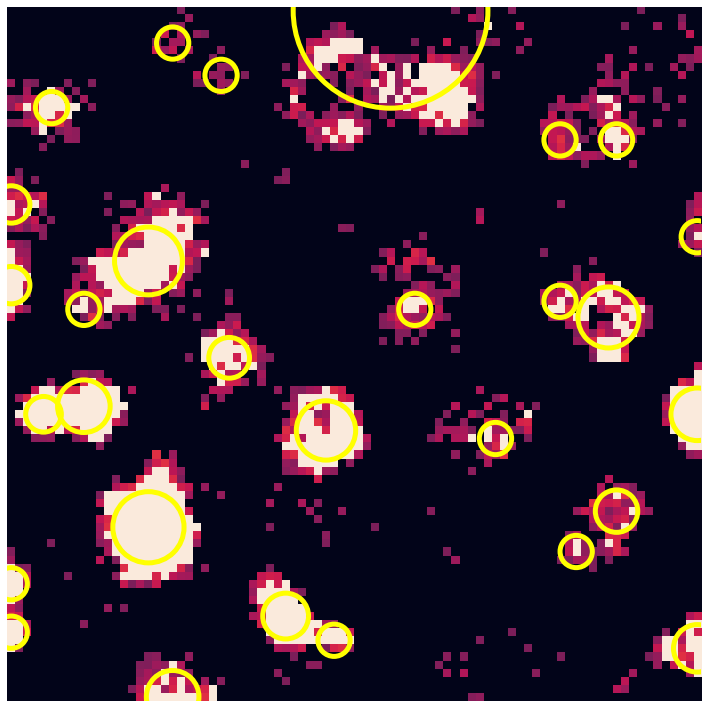

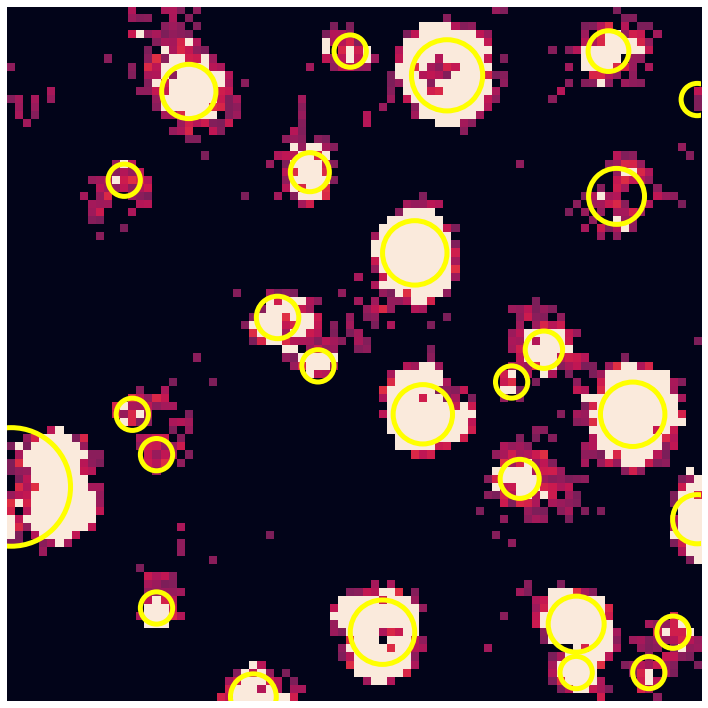

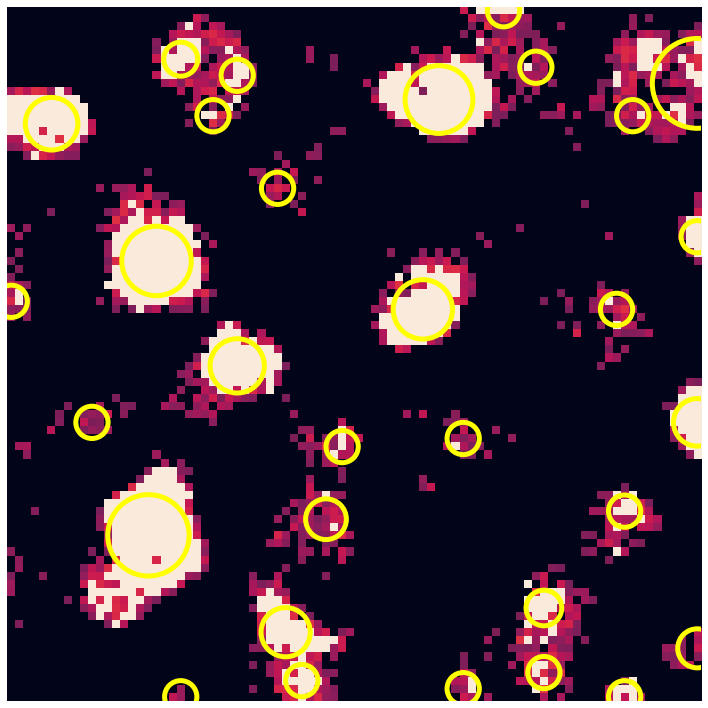

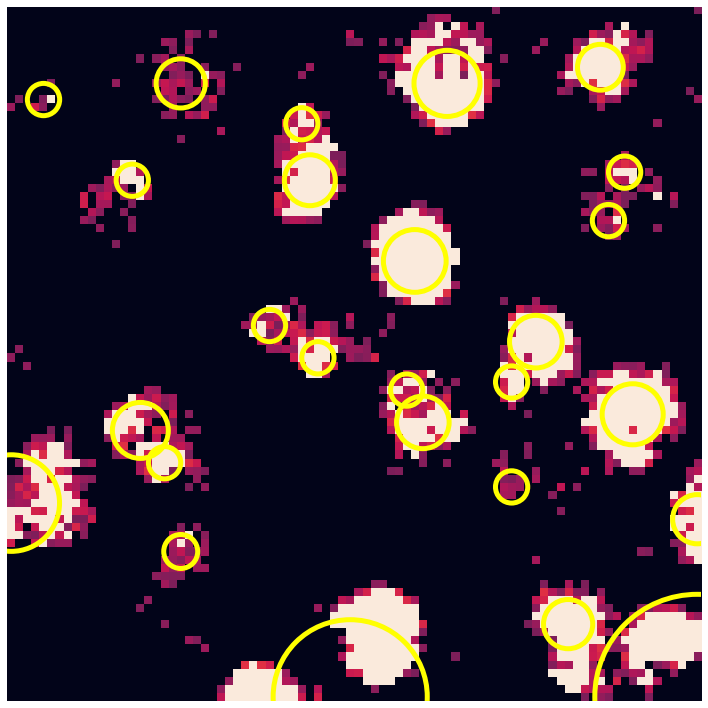

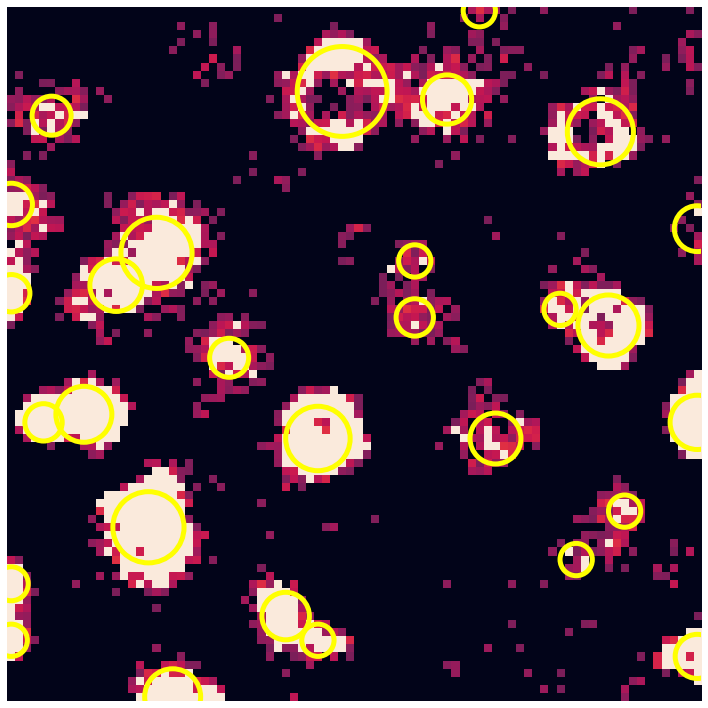

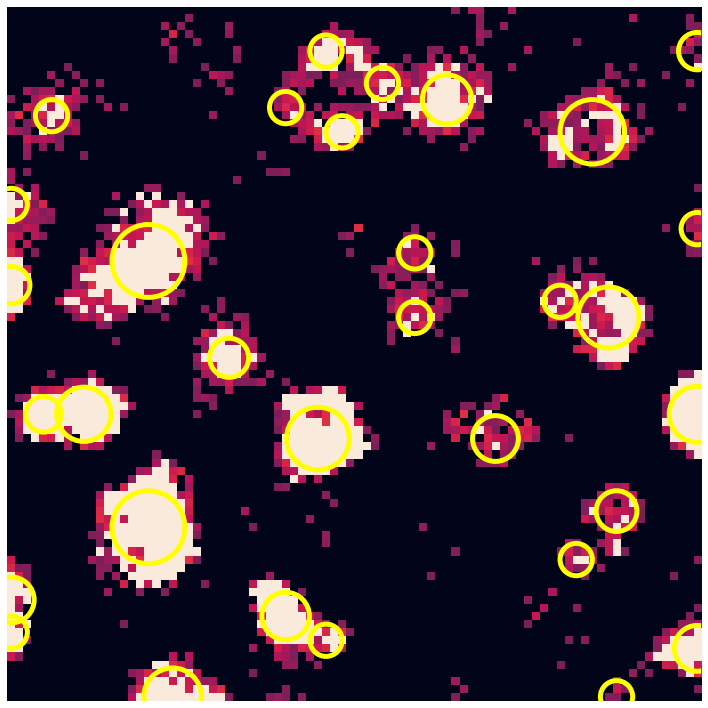

In [23]:
for i, image in enumerate(images):
    laplacian_gaussian(i, image)

In [24]:
all_radii = [v for v in all_radii_pre if (2.0 < v < 8.0)]

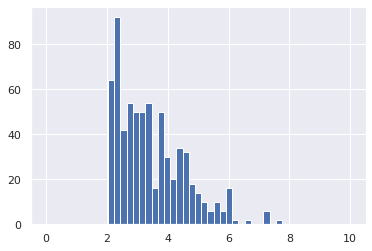

In [25]:
plt.hist(all_radii, bins=np.linspace(0, 10, 50));

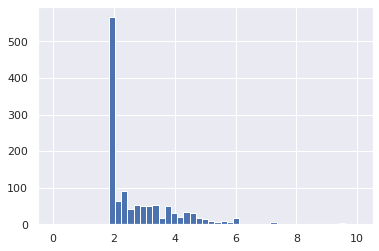

In [26]:
plt.hist(all_radii_pre, bins=np.linspace(0, 10, 50));

In [27]:
len(all_radii)

680

In [10]:
all_radii[:20]

[2.1048387096774195,
 3.3629032258064515,
 3.5725806451612905,
 2.2096774193548385,
 2.1048387096774195,
 2.314516129032258,
 7.241935483870967,
 3.153225806451613,
 3.991935483870968,
 3.3629032258064515,
 2.4193548387096775,
 2.1048387096774195,
 2.4193548387096775,
 3.782258064516129,
 3.991935483870968,
 3.153225806451613,
 2.4193548387096775,
 6.088709677419355,
 2.7338709677419355,
 3.887096774193548]

In [47]:
all_blobs

{0: array([[ 80.        , -11.        ,  -0.31451613],
        [ 76.        ,  30.        ,  -0.41935484],
        [ 76.        ,   4.        ,  -0.41935484],
        [ 74.        ,  44.        ,   0.94354839],
        [ 71.        ,  29.        ,   1.15322581],
        [ 70.        ,   3.        ,  -0.20967742],
        [ 68.        , -22.        ,  -0.31451613],
        [ 59.        ,  44.        ,  -0.10483871],
        [ 54.        , -41.        ,   4.82258065],
        [ 53.        ,  23.        ,   0.73387097],
        [ 45.        ,  35.        ,   1.57258065],
        [ 45.        ,  10.        ,   0.94354839],
        [ 36.        , -22.        ,   0.        ],
        [ 34.        , -26.        ,  -0.31451613],
        [ 33.        ,  -8.        ,   0.        ],
        [ 32.        ,   4.        ,  -0.41935484],
        [ 26.        ,   9.        ,   1.36290323],
        [ 24.        , -33.        ,  -0.41935484],
        [ 23.        ,  30.        ,  -0.41935484],
        [

In [46]:
num_synapes_per_slice_pre_filter = []
num_synapes_per_slice = []
real_all_blobs = {}
for i, blobs in all_blobs.items():
    num_synapes_per_slice_pre_filter.append(len(blobs))
    print(f'Slice {i} has {len(blobs)} synapes.')
    print([blob[2] for blob in blobs])
    real_blobs = [blob for blob in blobs if 2.0 < blob[2] < 8.0]
    real_all_blobs[i] = real_blobs
    print(f'Slice {i} really has more like {len(real_blobs)} synapes.')    


Slice 0 has 26 synapes.
[-0.314516129032258, -0.4193548387096775, -0.4193548387096775, 0.943548387096774, 1.153225806451613, -0.20967741935483897, -0.314516129032258, -0.10483870967741948, 4.822580645161288, 0.7338709677419355, 1.5725806451612905, 0.943548387096774, 0.0, -0.314516129032258, 0.0, -0.4193548387096775, 1.3629032258064515, -0.4193548387096775, -0.4193548387096775, -0.4193548387096775, -0.4193548387096775, -0.4193548387096775, 1.5725806451612905, 0.7338709677419355, 0.0, 6.185483870967742]
Slice 0 really has more like 2 synapes.
Slice 1 has 26 synapes.
[4.088709677419355, 0.7338709677419355, 0.0, 0.0, 1.887096774193548, 0.0, 0.0, 0.7338709677419355, 1.0483870967741935, 1.153225806451613, 2.201612903225806, 0.0, 0.0, 0.0, 1.5725806451612905, 2.516129032258064, 0.4193548387096775, 0.0, 0.0, 0.0, 0.314516129032258, 0.838709677419355, 0.0, 4.088709677419355, 5.346774193548388, 5.556451612903226]
Slice 1 really has more like 6 synapes.
Slice 2 has 31 synapes.
[-0.419354838709677

In [34]:
def difference_of_gaussian(image):                                    
    minima = np.linspace(5, 7, 3)                               
    maxima = np.linspace(10, 20, 3)                              
    thresholds = np.linspace(0.08, 0.12, 3)                      
    parameters = list(zip(minima, maxima, thresholds))   
    blobs = {}                                                    
                                                                  
    for i, params in enumerate(parameters):                       
        blobs_dog = blob_dog(                                     
            image,                                                
            min_sigma=int(params[0]),                             
            max_sigma=int(params[1]),                             
            threshold=int(params[2]),                             
        )                                                         
        blobs[i] = [blobs_dog, params]                            
                                                                  
    radii = {}                                                    
    for i, b in blobs.items():                                    
        blobs_dog = blobs[i][0]
        radii[i] = [b[2] for b in blobs_dog]                      
                                                                  
    for r in radii.values():                                      
        median = np.median(r)                                     
        mean = np.mean(r)                                         
        std = np.std(r)                                           
        print(median, mean, std)                                  
                                                                  
    fig, axes = plt.subplots(                                     
        1, 3, figsize=(15, 30), sharex=True, sharey=True          
    )                                                            
    ax = axes.ravel()                                             
                                                                  
    for i, blob in blobs.items():                                 
        ax[i].set_title(f'{blobs[i][1]}')                         
        ax[i].imshow(image, interpolation='nearest')              
        log_blobs = blobs[i][0]                                   
        for b in log_blobs:                                       
            y, x, r = b                                           
            c = plt.Circle(                                       
                (x, y), r, color='yellow', linewidth=3, fill=False
            )                                                     
            ax[i].add_patch(c)                                    
        ax[i].set_axis_off()                                      
    plt.tight_layout()                                            
    plt.show()

5.0 5.75 1.299038105676658
6.0 7.384615384615385 1.751415319477872
7.0 10.120000000000001 4.933153149862672


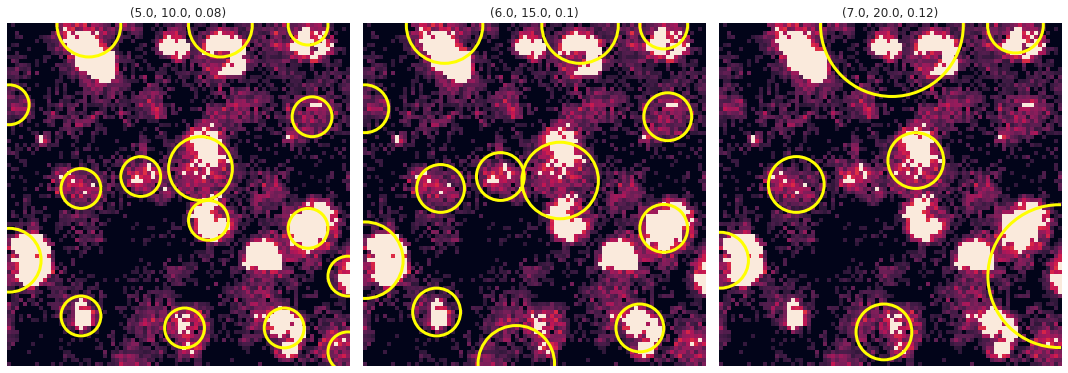

5.0 5.857142857142857 1.3552618543578767
6.0 6.981818181818183 1.6033023770944446
7.0 8.512 3.3767582086966197


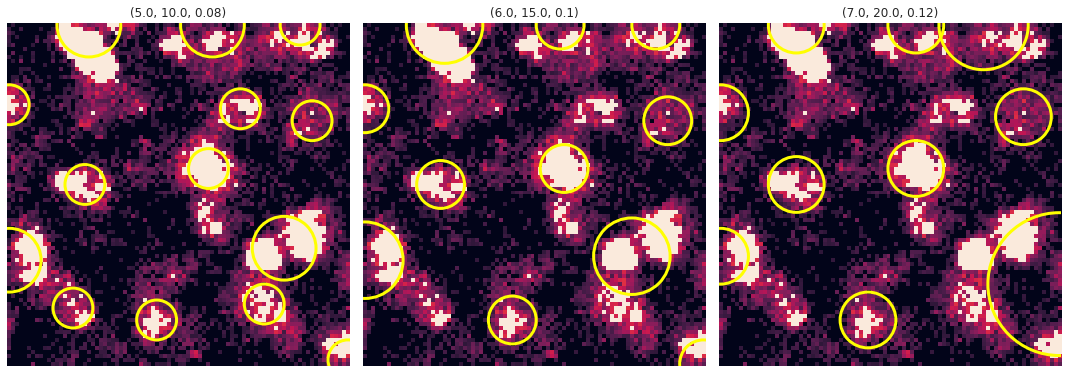

5.0 5.315789473684211 0.9206766149755738
6.0 6.423529411764705 1.1598830629521169
7.0 8.374545454545455 3.2488217826169867


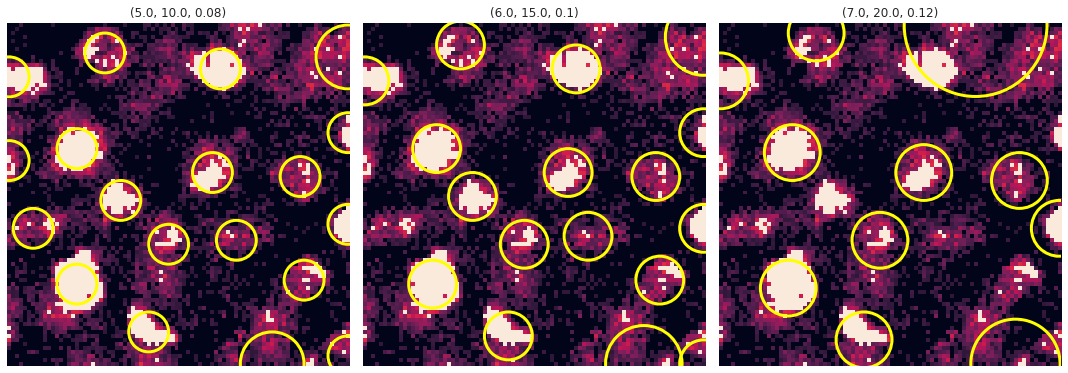

5.0 5.428571428571429 1.049781318335648
6.0 6.553846153846153 1.2988843642587964
7.0 7.381818181818182 1.2074151066097452


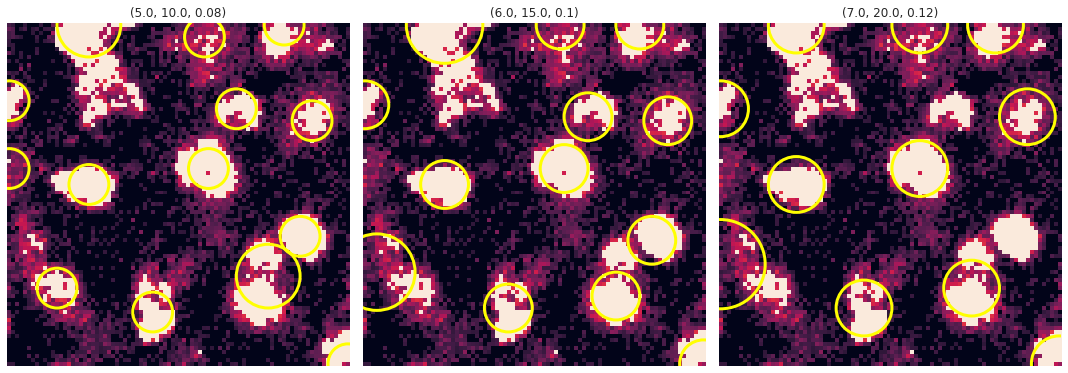

5.0 5.375 0.9921567416492215
6.0 6.239999999999999 0.8979977728257462
7.0 7.0 0.0


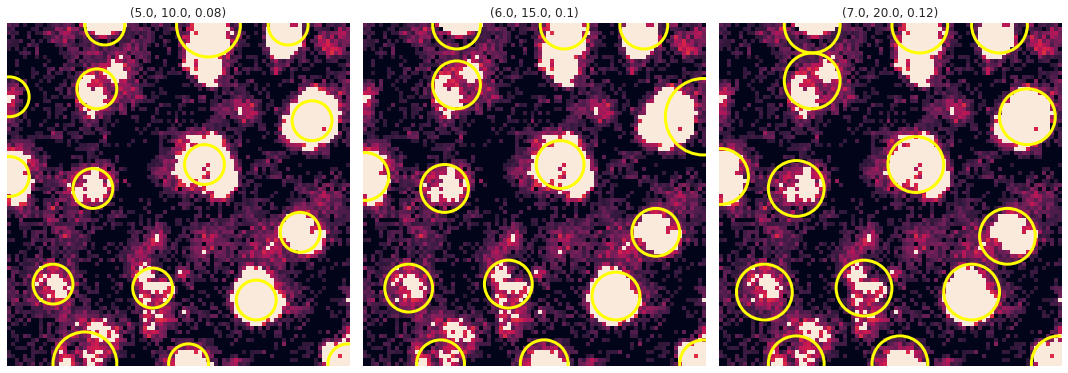

5.0 5.45 1.0712142642814275
6.0 6.675000000000001 1.4051245496396403
7.0 8.26 3.133624099983915


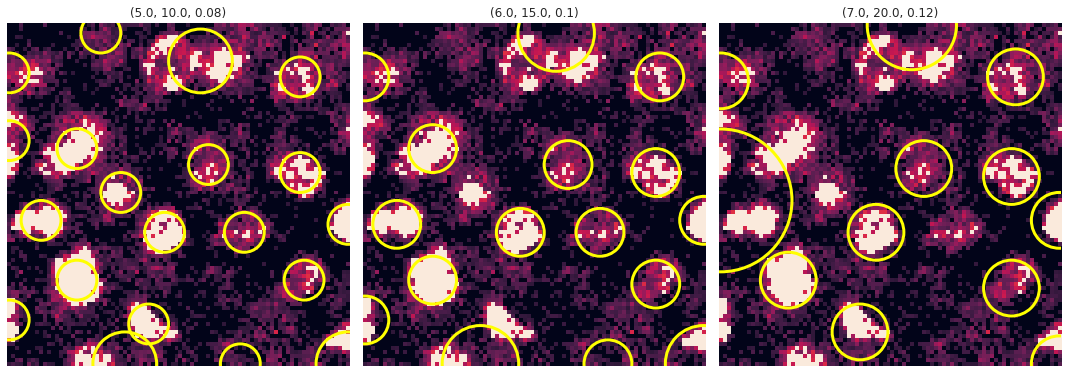

5.0 5.352941176470588 0.9665692191267637
6.0 6.239999999999999 0.8979977728257462
7.0 7.3 1.081665382639197


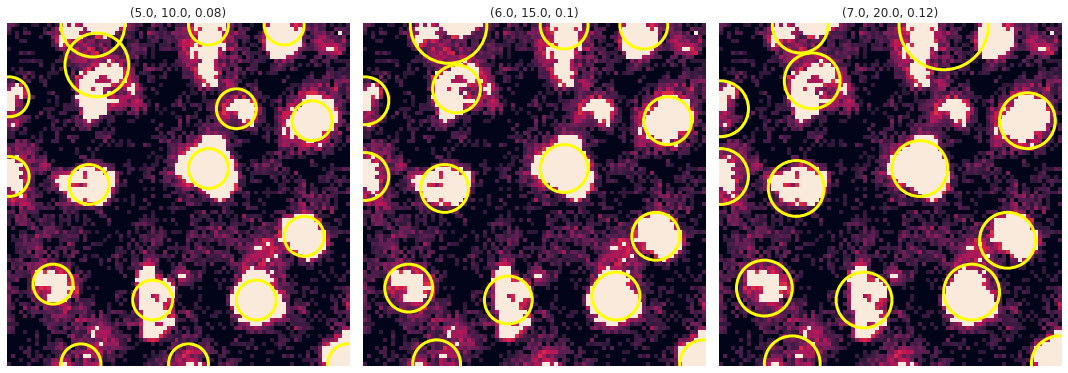

5.0 5.375 0.9921567416492215
6.0 6.239999999999999 0.8979977728257462
7.0 7.0 0.0


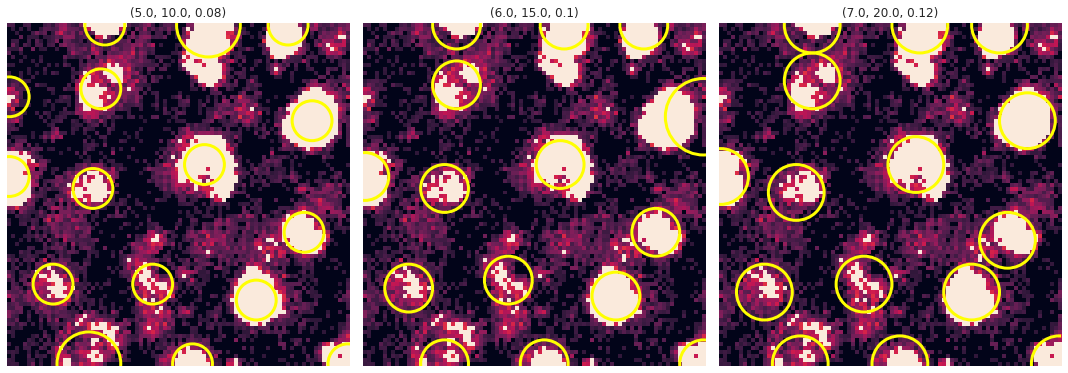

5.0 5.5 1.118033988749895
6.0 7.028571428571429 1.626314225229453
7.0 9.352 3.418294311495136


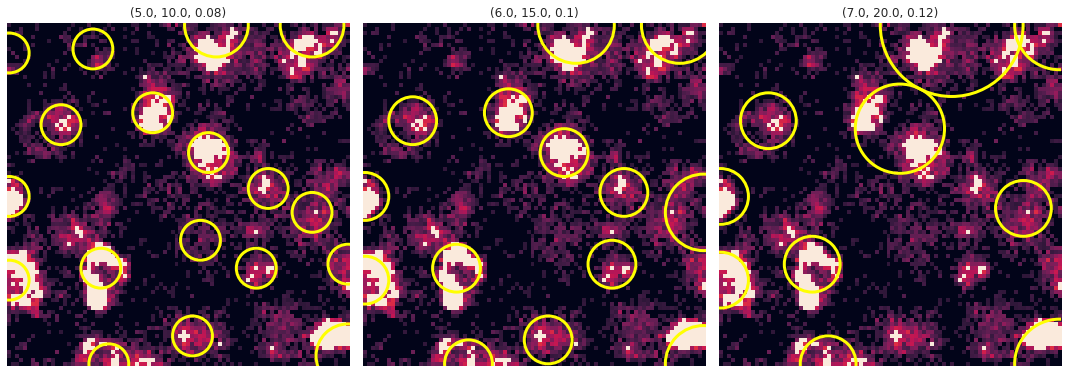

5.0 5.352941176470588 0.9665692191267637
6.0 6.83076923076923 1.516770159245076
7.0 9.184000000000001 4.368


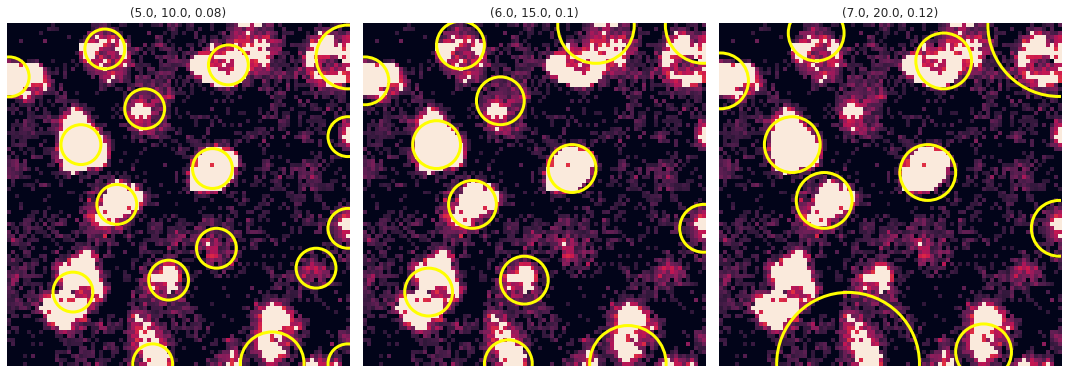

5.0 5.6 1.2
6.0 6.7714285714285705 1.4771732519669223
7.0 8.985454545454546 4.211785118485691


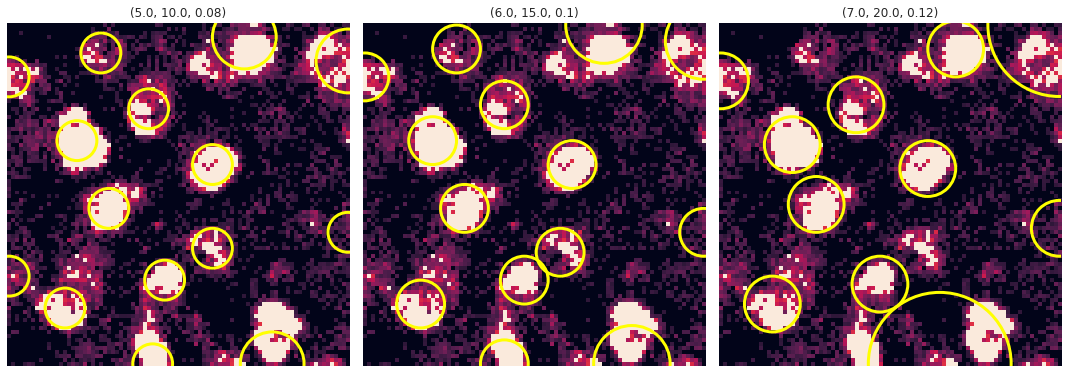

5.0 5.375 0.9921567416492215
6.0 6.553846153846153 1.2988843642587964
7.0 9.73 4.728498704663036


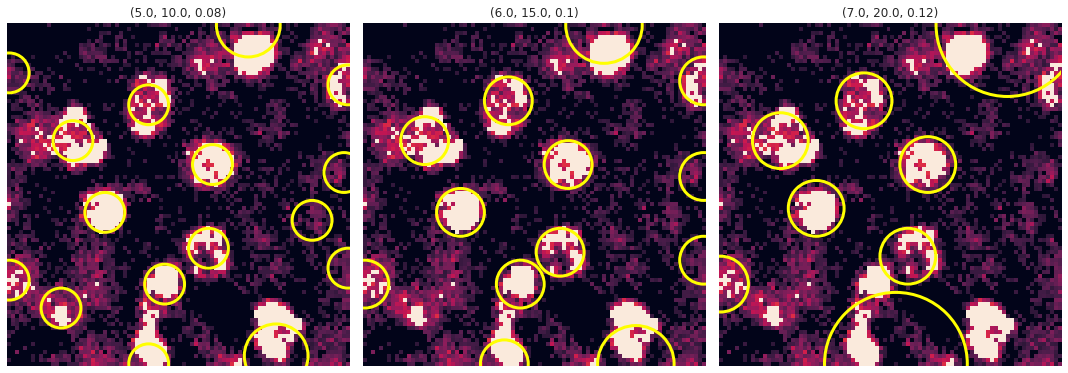

5.0 5.473684210526316 1.093926825832975
6.0 7.5 1.7748239349298853
9.100000000000001 9.940000000000001 3.5884815730333637


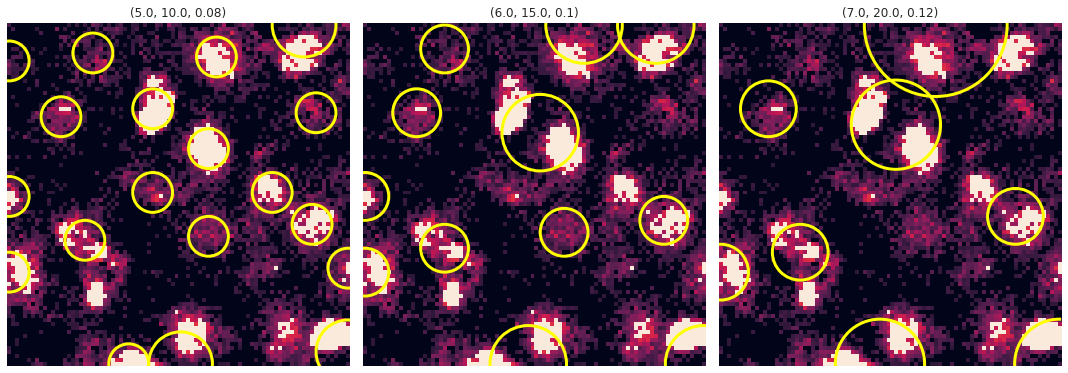

5.0 5.391304347826087 1.0103434816193262
6.0 6.211764705882352 0.8470588235294121
7.0 8.26 3.133624099983915


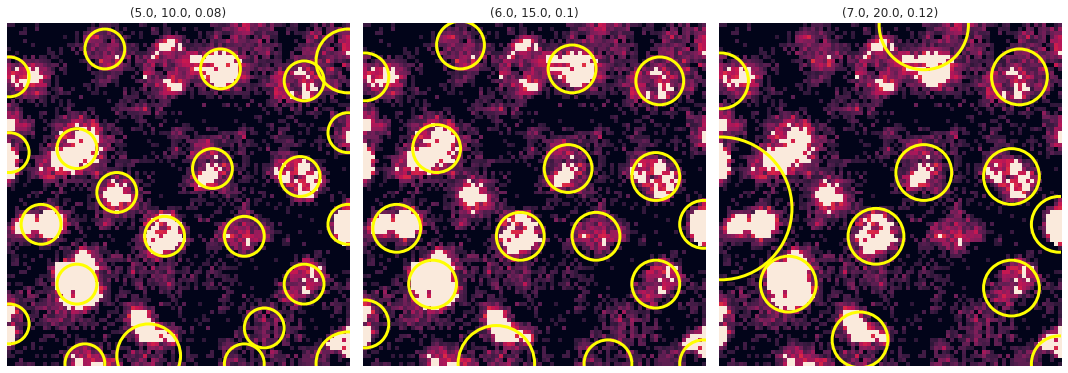

5.0 5.705882352941177 1.2725475089872904
6.0 6.96 1.591979899370593
7.0 8.756363636363638 3.3110483720891266


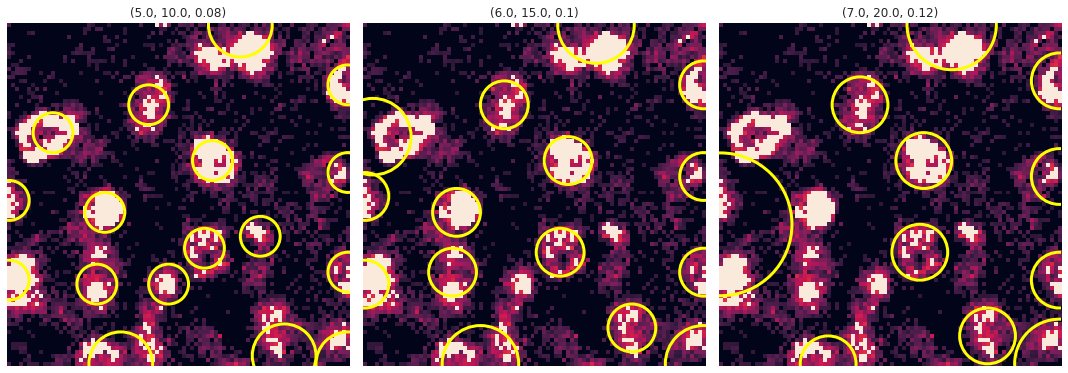

5.0 5.473684210526316 1.093926825832975
6.0 6.96 1.5919798993705927
7.0 9.613333333333335 3.507148255903775


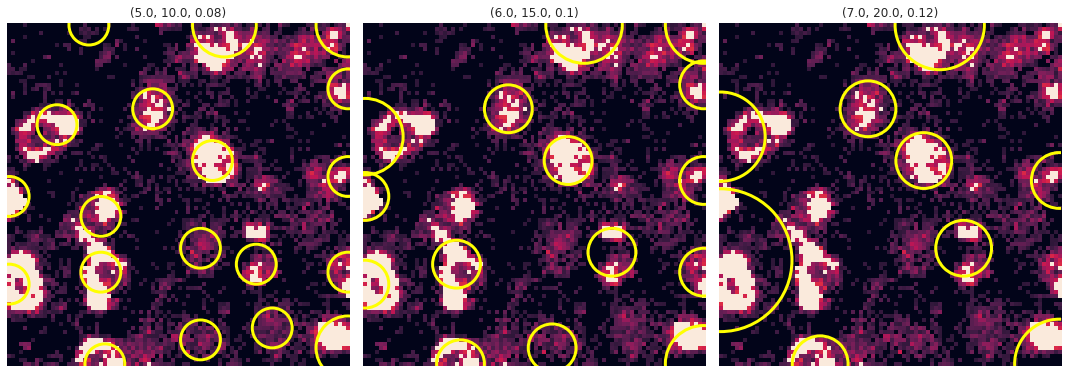

5.0 5.142857142857143 0.63887656499994
6.0 6.3999999999999995 1.1313708498984765
7.0 8.163076923076924 3.0293522654074083


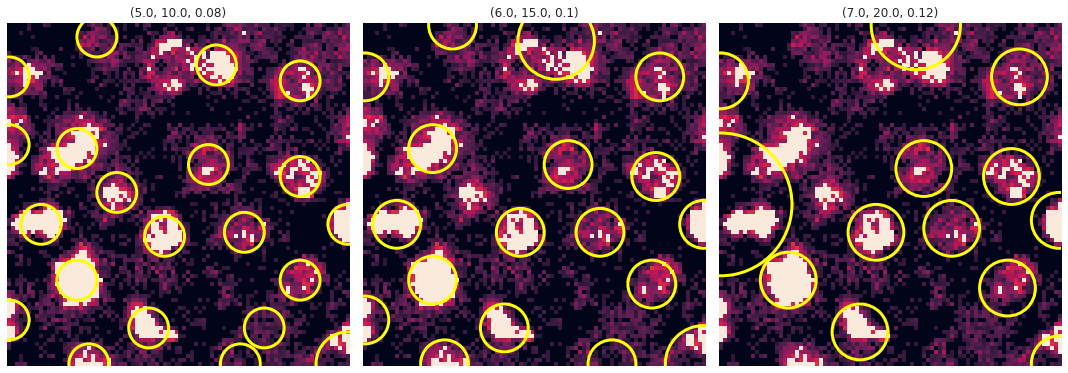

5.0 5.631578947368421 1.2230473724865527
6.0 7.384615384615385 1.7514153194778723
7.0 10.255 4.62834473651218


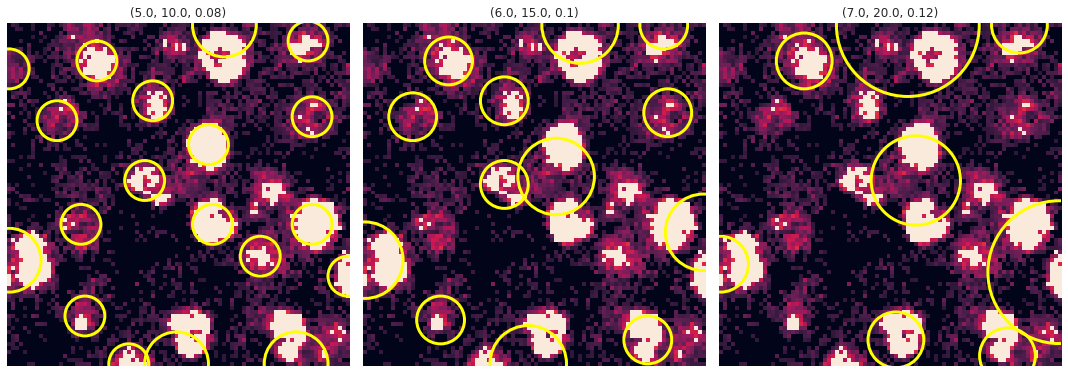

5.0 5.352941176470588 0.9665692191267637
6.0 6.719999999999999 1.4400000000000006
7.0 8.512 3.3767582086966197


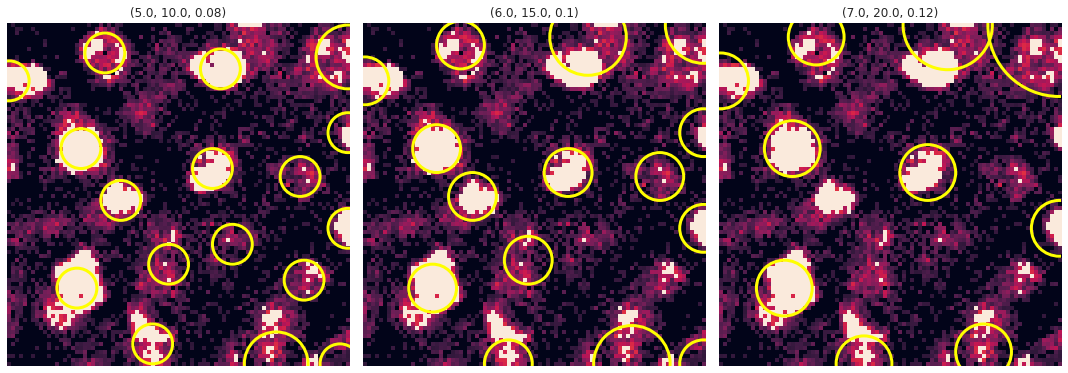

5.0 5.473684210526316 1.093926825832975
6.0 7.125 1.6686446595965247
7.0 9.893333333333334 4.481944022656043


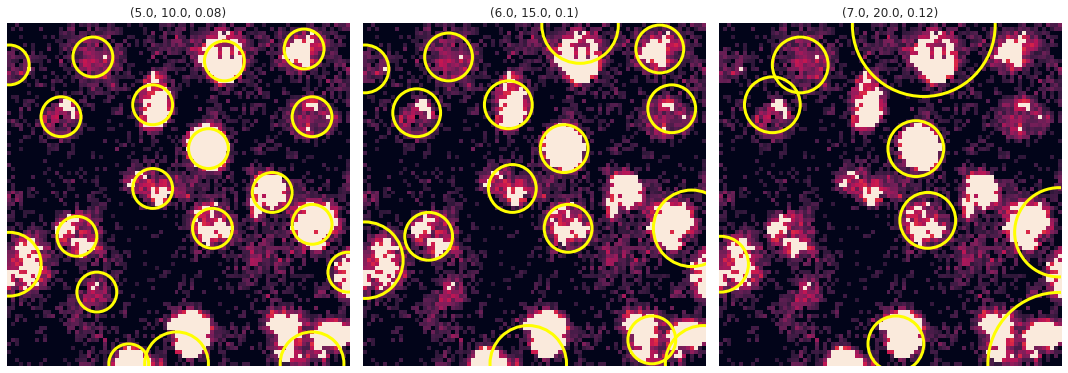

5.0 5.631578947368421 1.2230473724865527
6.0 6.45 1.1905880899790664
7.0 8.163076923076924 3.0293522654074083


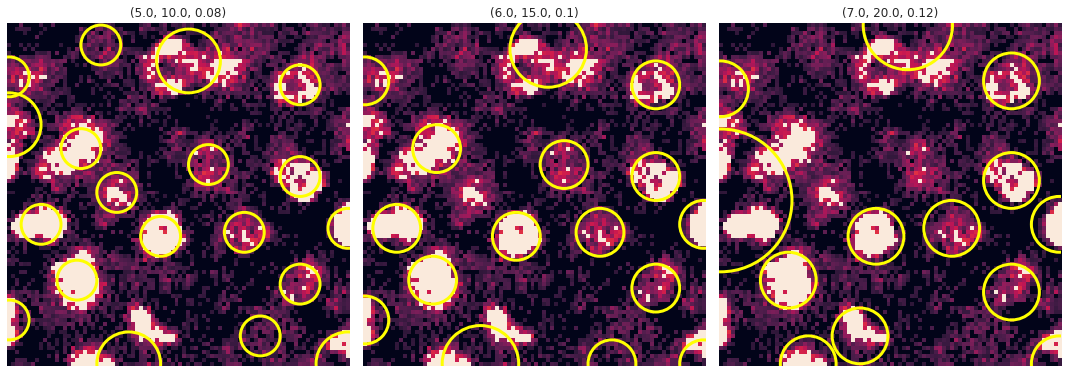

5.0 5.45 1.0712142642814275
6.0 6.720000000000001 1.4400000000000004
7.0 8.26 3.133624099983915


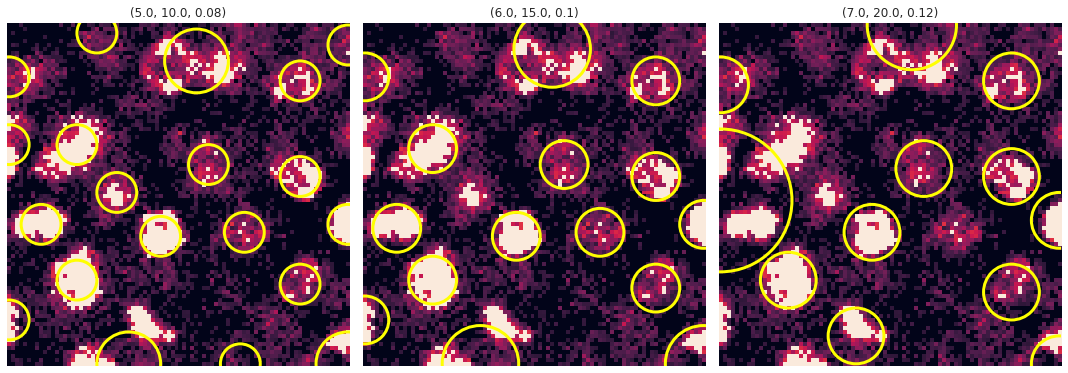

In [35]:
for image in images:
    difference_of_gaussian(image)

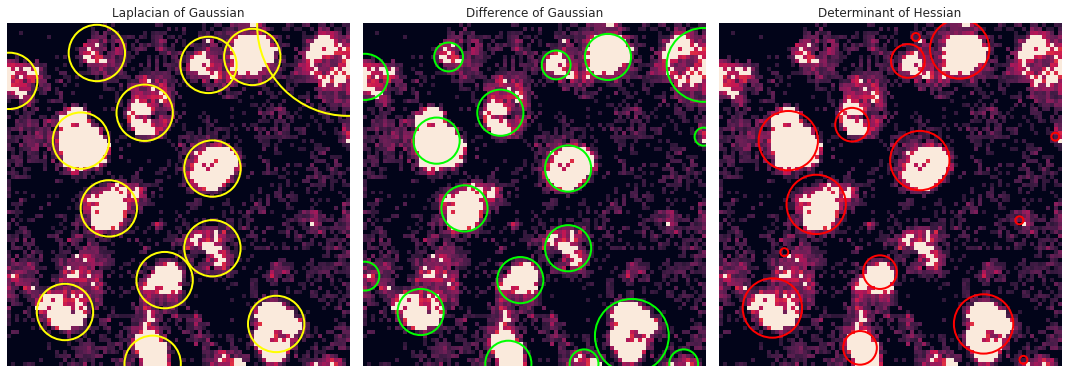

In [8]:
final_series = images
image_gray = final_series[10]
blobs_log = blob_log(image_gray, min_sigma=5, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=10, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image_gray, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()


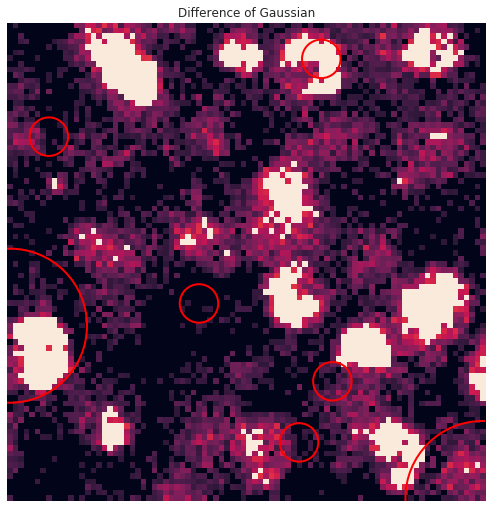

In [9]:
def make_blobs_dog(image_sequence=final_series, z_layer=0):
    
    blobs = blob_dog(image_sequence, min_sigma=2, max_sigma=50, sigma_ratio=4, threshold=.5, overlap=0)
    blobs[:, 3] = blobs[:, 3] * sqrt(3)
    
    blobs_0 = blobs[blobs[:, 0] == z_layer]
    fig, ax = plt.subplots(1, 1, figsize=(7, 15))

    ax.set_title('Difference of Gaussian')
    ax.imshow(image_sequence[z_layer], interpolation='nearest')
    for blob in blobs_0:
        p, x, y, r = blob
        c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_patch(c)
    ax.set_axis_off()

    plt.tight_layout()
    plt.show()

make_blobs_dog(z_layer=0)

10


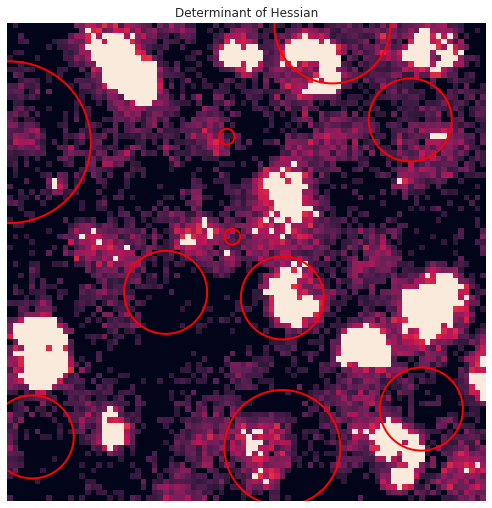

In [10]:
def make_blobs_doh(image_sequence=final_series, z_layer=0):
    
    blobs = blob_doh(image_sequence[z_layer], min_sigma=1, max_sigma=20, threshold=.009, log_scale=True, overlap=0)
    blobs[:, 2] = blobs[:, 2] * sqrt(2)
    print(len(blobs))
    
    fig, ax = plt.subplots(1, 1, figsize=(7, 15))

    ax.set_title('Determinant of Hessian')
    ax.imshow(image_sequence[z_layer], interpolation='nearest')
    for blob in blobs:
        x, y, r = blob
        c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_patch(c)
    ax.set_axis_off()

    plt.tight_layout()
    plt.show()

make_blobs_doh()

In [11]:
final_series[0]

array([[ 0, 24,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0, 22,  0],
       [ 0,  0, 32, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 70, 82, 57],
       [ 0,  0,  0, ..., 51, 42, 43],
       [31,  0,  0, ..., 56, 26, 51]], dtype=uint8)

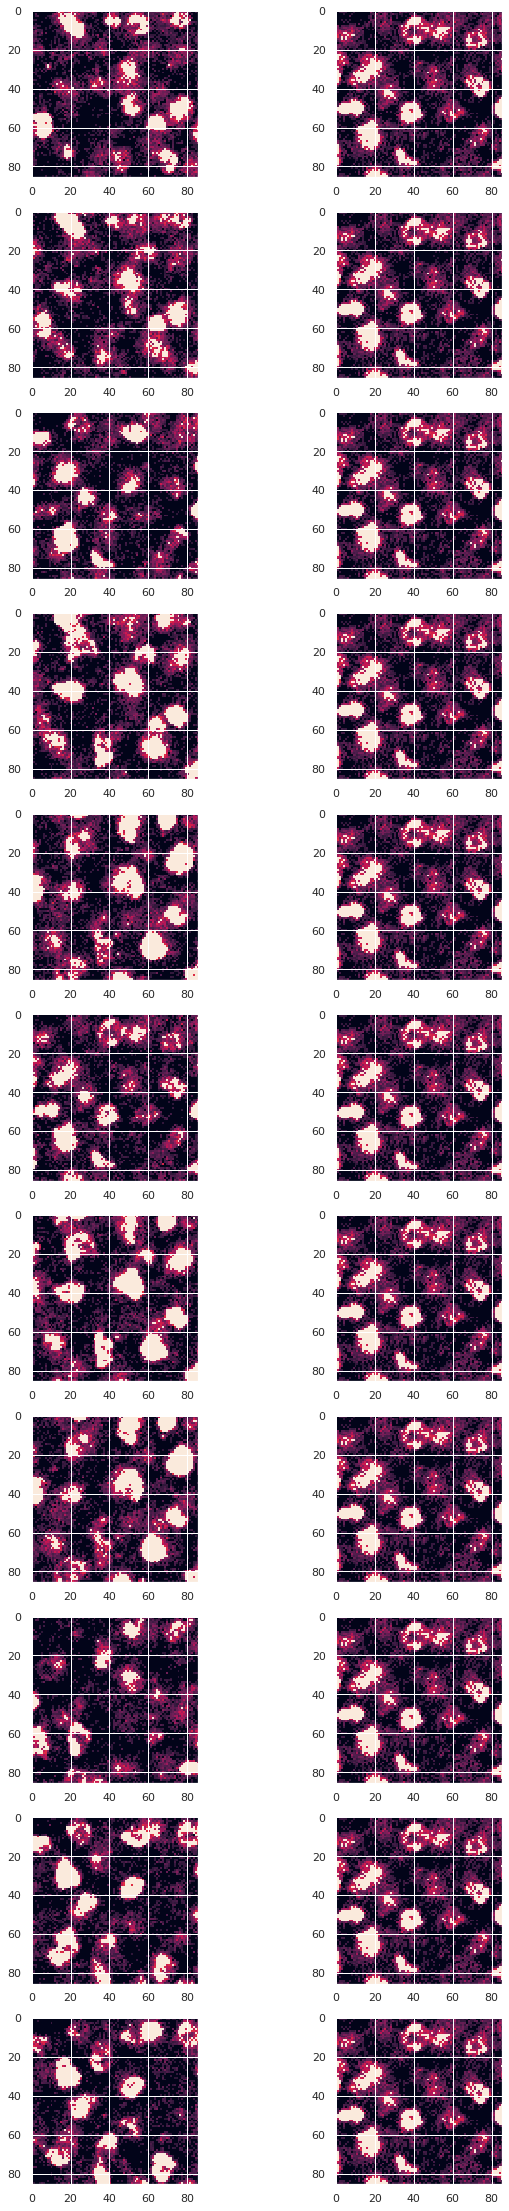

In [12]:
series_lengths = int(len(final_series))
rows = int(series_lengths/2)
cols = 2

fig, ax = plt.subplots(rows, cols, figsize=(10,40))
for layer in range(series_lengths-1):
    if (layer * 2) < series_lengths:
        ax[layer, 0].imshow(final_series[layer])
    else:
        for index in range(int(series_lengths/2)):
            ax[index, 1].imshow(final_series[layer])

In [13]:
coordinates = []
for (x,y), value in np.ndenumerate(final_series[0]):
    if value > 0:
        coordinates.append((x, y))

In [14]:
contours = find_contours(final_series[0], 0)

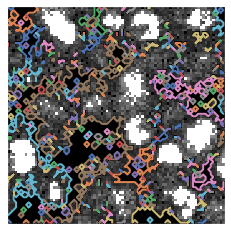

In [15]:
fig, ax = plt.subplots()
ax.imshow(final_series[0], cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()